# Extracting and Visualizing Stock Data

In [2]:
!pip install yfinance
!pip install pandas
!pip install nbformat

In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [67]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Task 1: using yfinance to extract stock data

In [13]:
# extract stock data of Tesla using Ticker and ticker symbol TSLA
tesla = yf.Ticker("TSLA")

In [15]:
# extract stock data and save it into a dataframe with information of the max amount of time
tesla_data = tesla.history(period="max")

In [17]:
# reset the index
tesla_data.reset_index(inplace=True)

#print the first five rows
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Task 2: using Webscrapping to extract Tesla revenue data

In [24]:
# use Requests library to download the webpage

html = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

html_data = requests.get(html).text

In [26]:
# parse the html

beautiful_soup = BeautifulSoup(html_data, "html5lib")

In [32]:
# extract the table of Tesla Quarterly Revenue

# create an empty data frame and identify the column names
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

#list to hold the row data
row_list = []

for row in beautiful_soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    row_list.append({"Date":date, "Revenue":revenue})

tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame(row_list)], ignore_index=True)

In [40]:
# remove the comma and dollar sign from the Revenue column

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

In [36]:
# remove an empty string from the Revenue column

tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [42]:
# display the last five row

tesla_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Task 3: use yfinance to extract stock data

In [47]:
# extract stock data of GameStop using Ticker and ticker symbol GME
gamestop = yf.Ticker("GME")

In [49]:
# extract stock data and save it into a dataframe with information of the max amount of time
gme_data = gamestop.history(period="max")

In [51]:
# reset the index
gme_data.reset_index(inplace=True)

#print the first five rows
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Task 4: use Webscrapping to extract GME revenue data

In [54]:
# use Requests library to download the webpage

html2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data_2 = requests.get(html2).text

In [56]:
# parse the html

beautiful_soup = BeautifulSoup(html_data_2, "html5lib")

In [58]:
# extract the table of GameStop Quarterly Revenue

# create an empty data frame and identify the column names
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

#list to hold the row data
row_list = []

for row in beautiful_soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    row_list.append({"Date":date, "Revenue":revenue})

gme_revenue = pd.concat([gme_revenue, pd.DataFrame(row_list)], ignore_index=True)

In [60]:
# remove the comma and dollar sign from the Revenue column

gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)

In [62]:
# display the last five rows

gme_revenue.tail(5)

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Task 5: plot Tesla stock graph

C:\Users\danie\AppData\Local\Temp\ipykernel_1092\3316612210.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\danie\AppData\Local\Temp\ipykernel_1092\3316612210.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



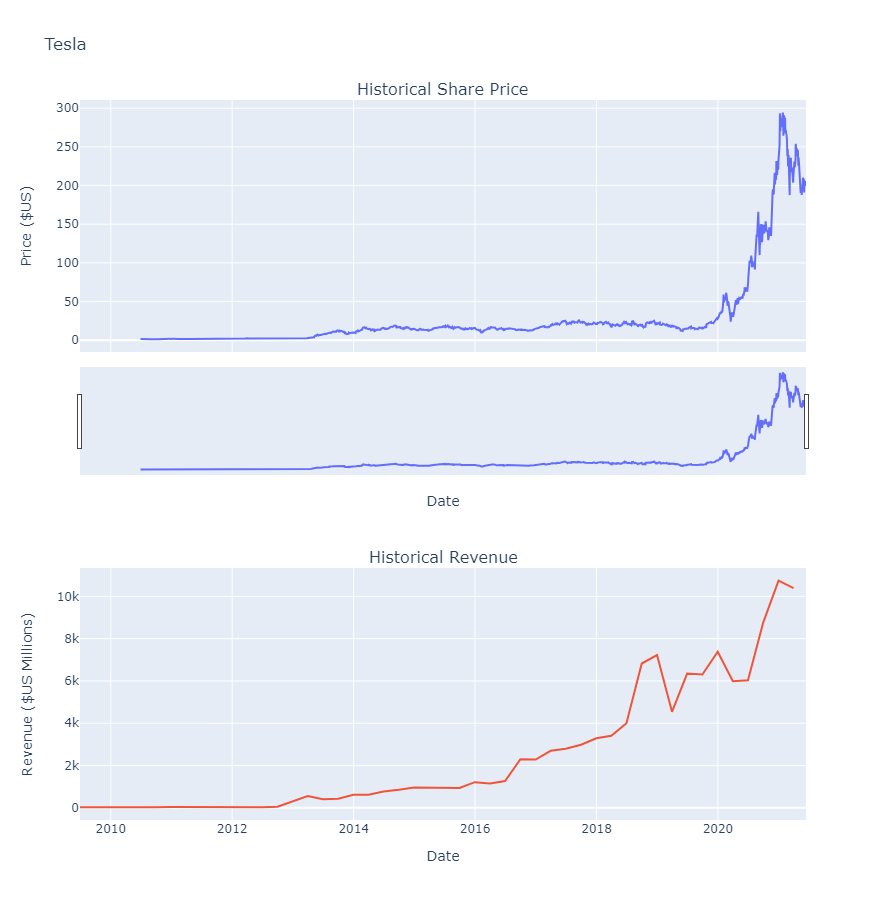

In [77]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Task 6: plot GameStop stock graph

C:\Users\danie\AppData\Local\Temp\ipykernel_1092\3316612210.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\danie\AppData\Local\Temp\ipykernel_1092\3316612210.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



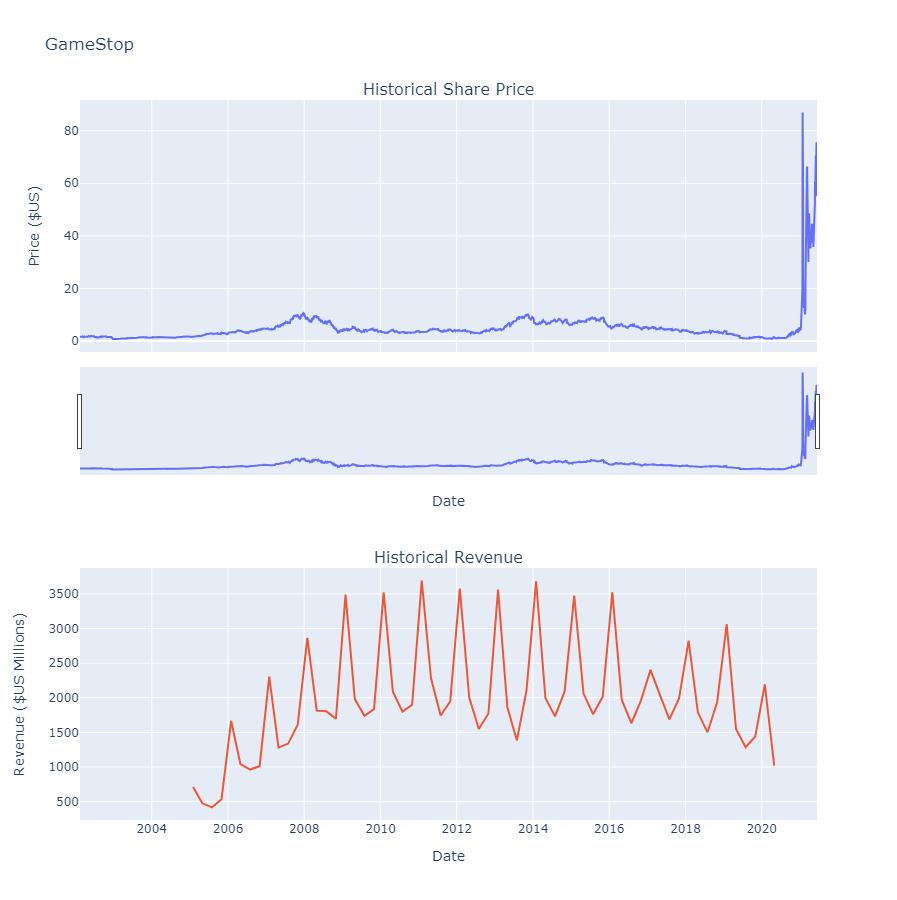

In [75]:
make_graph(gme_data, gme_revenue, 'GameStop')